In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()
%matplotlib notebook


In [2]:
datadf = pd.read_csv('C:/Users/ThuyHOANG/code/portfolio-projects/woman-violence-project/Data_woman.csv')


In [3]:
datadf.head()

,RecordID,Country,Gender,Demographics Question,Demographics Response,Question,Survey Year,Value
0,1,Afghanistan,F,Marital status,Never married,... if she burns the food,01/01/2015,NaN
1,1,Afghanistan,F,Education,Higher,... if she burns the food,01/01/2015,10.1
2,1,Afghanistan,F,Education,Secondary,... if she burns the food,01/01/2015,13.7
3,1,Afghanistan,F,Education,Primary,... if she burns the food,01/01/2015,13.8
4,1,Afghanistan,F,Marital status,"Widowed, divorced, separated",... if she burns the food,01/01/2015,13.8


In [4]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12600 entries, 0 to 12599
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               12600 non-null  int64  
 1   Country                12600 non-null  object 
 2   Gender                 12600 non-null  object 
 3   Demographics Question  12600 non-null  object 
 4   Demographics Response  12600 non-null  object 
 5   Question               12600 non-null  object 
 6   Survey Year            12600 non-null  object 
 7   Value                  11187 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 787.6+ KB


In [5]:
mean_value = datadf['Value'].mean()

datadf['Value'] = datadf['Value'].fillna(mean_value)
datadf['Country'].unique()


array(['Afghanistan', 'Albania', 'Angola', 'Armenia', 'Azerbaijan',
       'Bangladesh', 'Benin', 'Bolivia', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Chad', 'Colombia', 'Comoros', 'Congo',
       'Congo Democratic Republic', "Cote d'Ivoire", 'Dominican Republic',
       'Egypt', 'Eritrea', 'Eswatini', 'Ethiopia', 'Gabon', 'Gambia',
       'Ghana', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'India', 'Indonesia', 'Jordan', 'Kenya', 'Kyrgyz Republic',
       'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Maldives', 'Mali',
       'Moldova', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nepal',
       'Nicaragua', 'Niger', 'Nigeria', 'Pakistan', 'Peru', 'Philippines',
       'Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo',
       'Turkey', 'Turkmenistan', 'Uganda', 'Ukraine', 'Yemen', 'Zambia',
       'Zimbabwe'], dtype=object)

In [6]:
#data_groupby_country = datadf.groupby('Country')
#data_groupby_country.first()

#data_groupby_country_sort = data_groupby_country.sort_values('Value')

Select answers from different continent and country. For this project, I want to investigate more about Asian people views for the violence. 

In [7]:

Amerique = datadf[(datadf['Country'].isin(['Bolivia','Colombia','Dominican Republic','Guatemala','Haiti','Peru'])) ]
Europe = datadf[(datadf['Country'].isin(['','Albania', 'Moldova','Ukraine'])) ]
Africa = datadf[(datadf['Country'].isin(['Angola','Benin','Burkina Faso','Burundi','Cameroon','Chad','Comoros','Congo','Congo Democratic Republic',"Cote d'Ivoire",'Egypt','Eritrea',
                                         'Eswatini','Ethopia','Gabon','Gambia','Ghana','Guyana','Kenya','Lesotho','Liberia' , 'Madagascar', 'Malawi', 'Marocco','Mozambique','Namibia','Nicaragua', 'Niger', 'Nigeria','Rwanda', 'Sao Tome and Principe', 'Senegal', 'Sierra Leone',
       'South Africa','Togo','Tanzania','Uganda','Zambia',
       'Zimbabwe' ])) ]

Asia = datadf[(datadf['Country'].isin(['Armenia','Turkmenistan','Bangladesh','India', 'Maldives','Nepal','Pakistan','Tajikistan','Turkey','Cambodia','Indonesia','Mali','Philippines','Timor-Leste','Yemen','Afghanistan','Azerbaijan', 'Jordan','Kyrgyz Republic'])) ]
South_asia = datadf[(datadf['Country'].isin(['Bangladesh','India', 'Maldives','Nepal','Pakistan','Tajikistan','Turkey'])) ]
Middle_east = datadf[(datadf['Country'].isin(['Afghanistan','Azerbaijan', 'Jordan','Kyrgyz Republic',])) ]
Southest_asia = datadf[(datadf['Country'].isin(['Cambodia','Indonesia','Mali','Philippines','Timor-Leste','Yemen']))]


In [8]:
Asia.describe()

,RecordID,Value
count,3420.000000,3420.000000
mean,212.789474,23.224281
std,121.614791,16.978329
min,1.000000,0.000000
25%,111.000000,11.000000
50%,209.500000,19.762537
75%,321.000000,30.100000
max,418.000000,86.900000


In [9]:
Asia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3420 entries, 0 to 12239
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RecordID               3420 non-null   int64  
 1   Country                3420 non-null   object 
 2   Gender                 3420 non-null   object 
 3   Demographics Question  3420 non-null   object 
 4   Demographics Response  3420 non-null   object 
 5   Question               3420 non-null   object 
 6   Survey Year            3420 non-null   object 
 7   Value                  3420 non-null   float64
dtypes: float64(1), int64(1), object(6)
memory usage: 240.5+ KB


In [10]:
        
data_plot1 = pd.DataFrame(Asia, columns=['Country', 'Value'])
data_plot_agg =  pd.pivot_table(data_plot1, values = 'Value', index = 'Country', aggfunc = np.mean)
data_plot_agg.head()
data_plot_sorted = data_plot_agg.sort_values(by='Value', ascending=False)
ranking = data_plot_sorted.head(10)
ranking


,Value
Country,
Timor-Leste,46.210000
Afghanistan,41.155280
Mali,39.420000
Tajikistan,32.033491
Azerbaijan,31.805836
Turkmenistan,27.976268
Pakistan,24.123614
Yemen,23.691824
India,23.210556


<IPython.core.display.Javascript object>


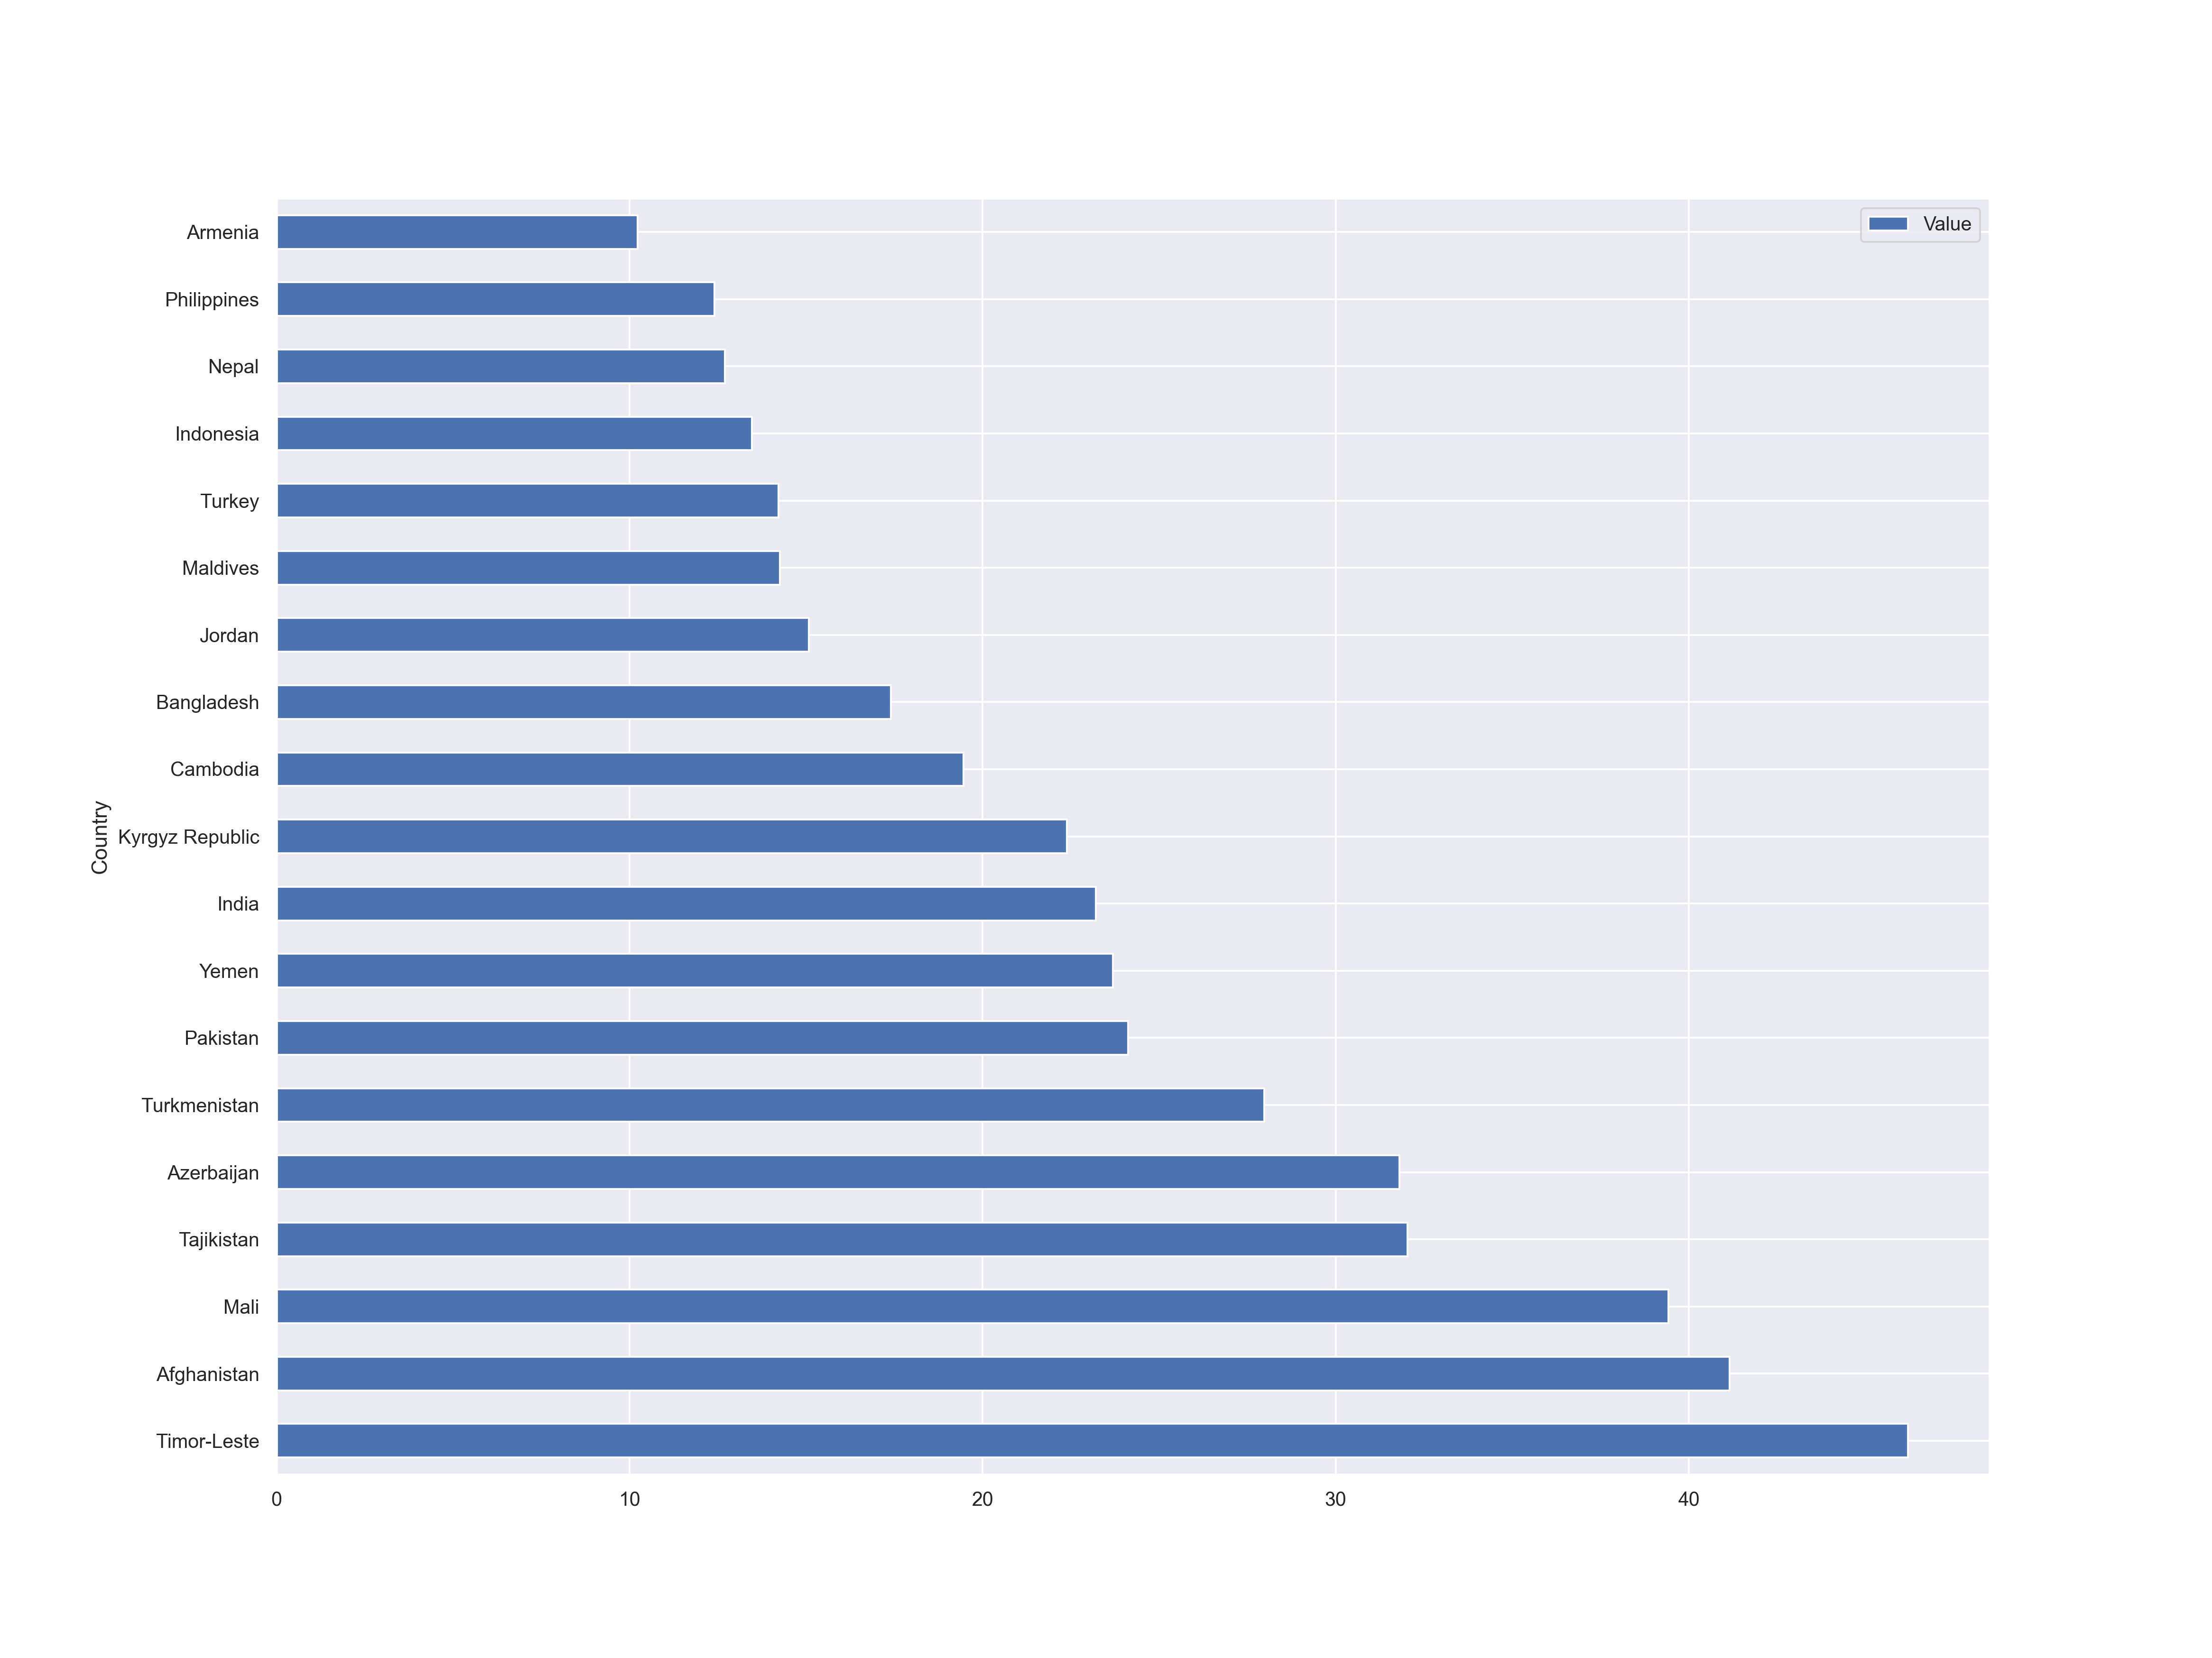

In [11]:
ax = data_plot_sorted.plot.barh()
#variables for plot 
index = ranking.index
values = ranking['Value']
plot_title = 'Top 10 country aggree with violence question'
title_size = 18
subtitle = 'Source: DataWorld / Woman data'
x_label = 'Percentage'
filename = 'barh-plot'

In [12]:
ranking.sort_values(by='Value', inplace=True, ascending=True)


C:\Users\ThuyHOANG\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


<IPython.core.display.Javascript object>


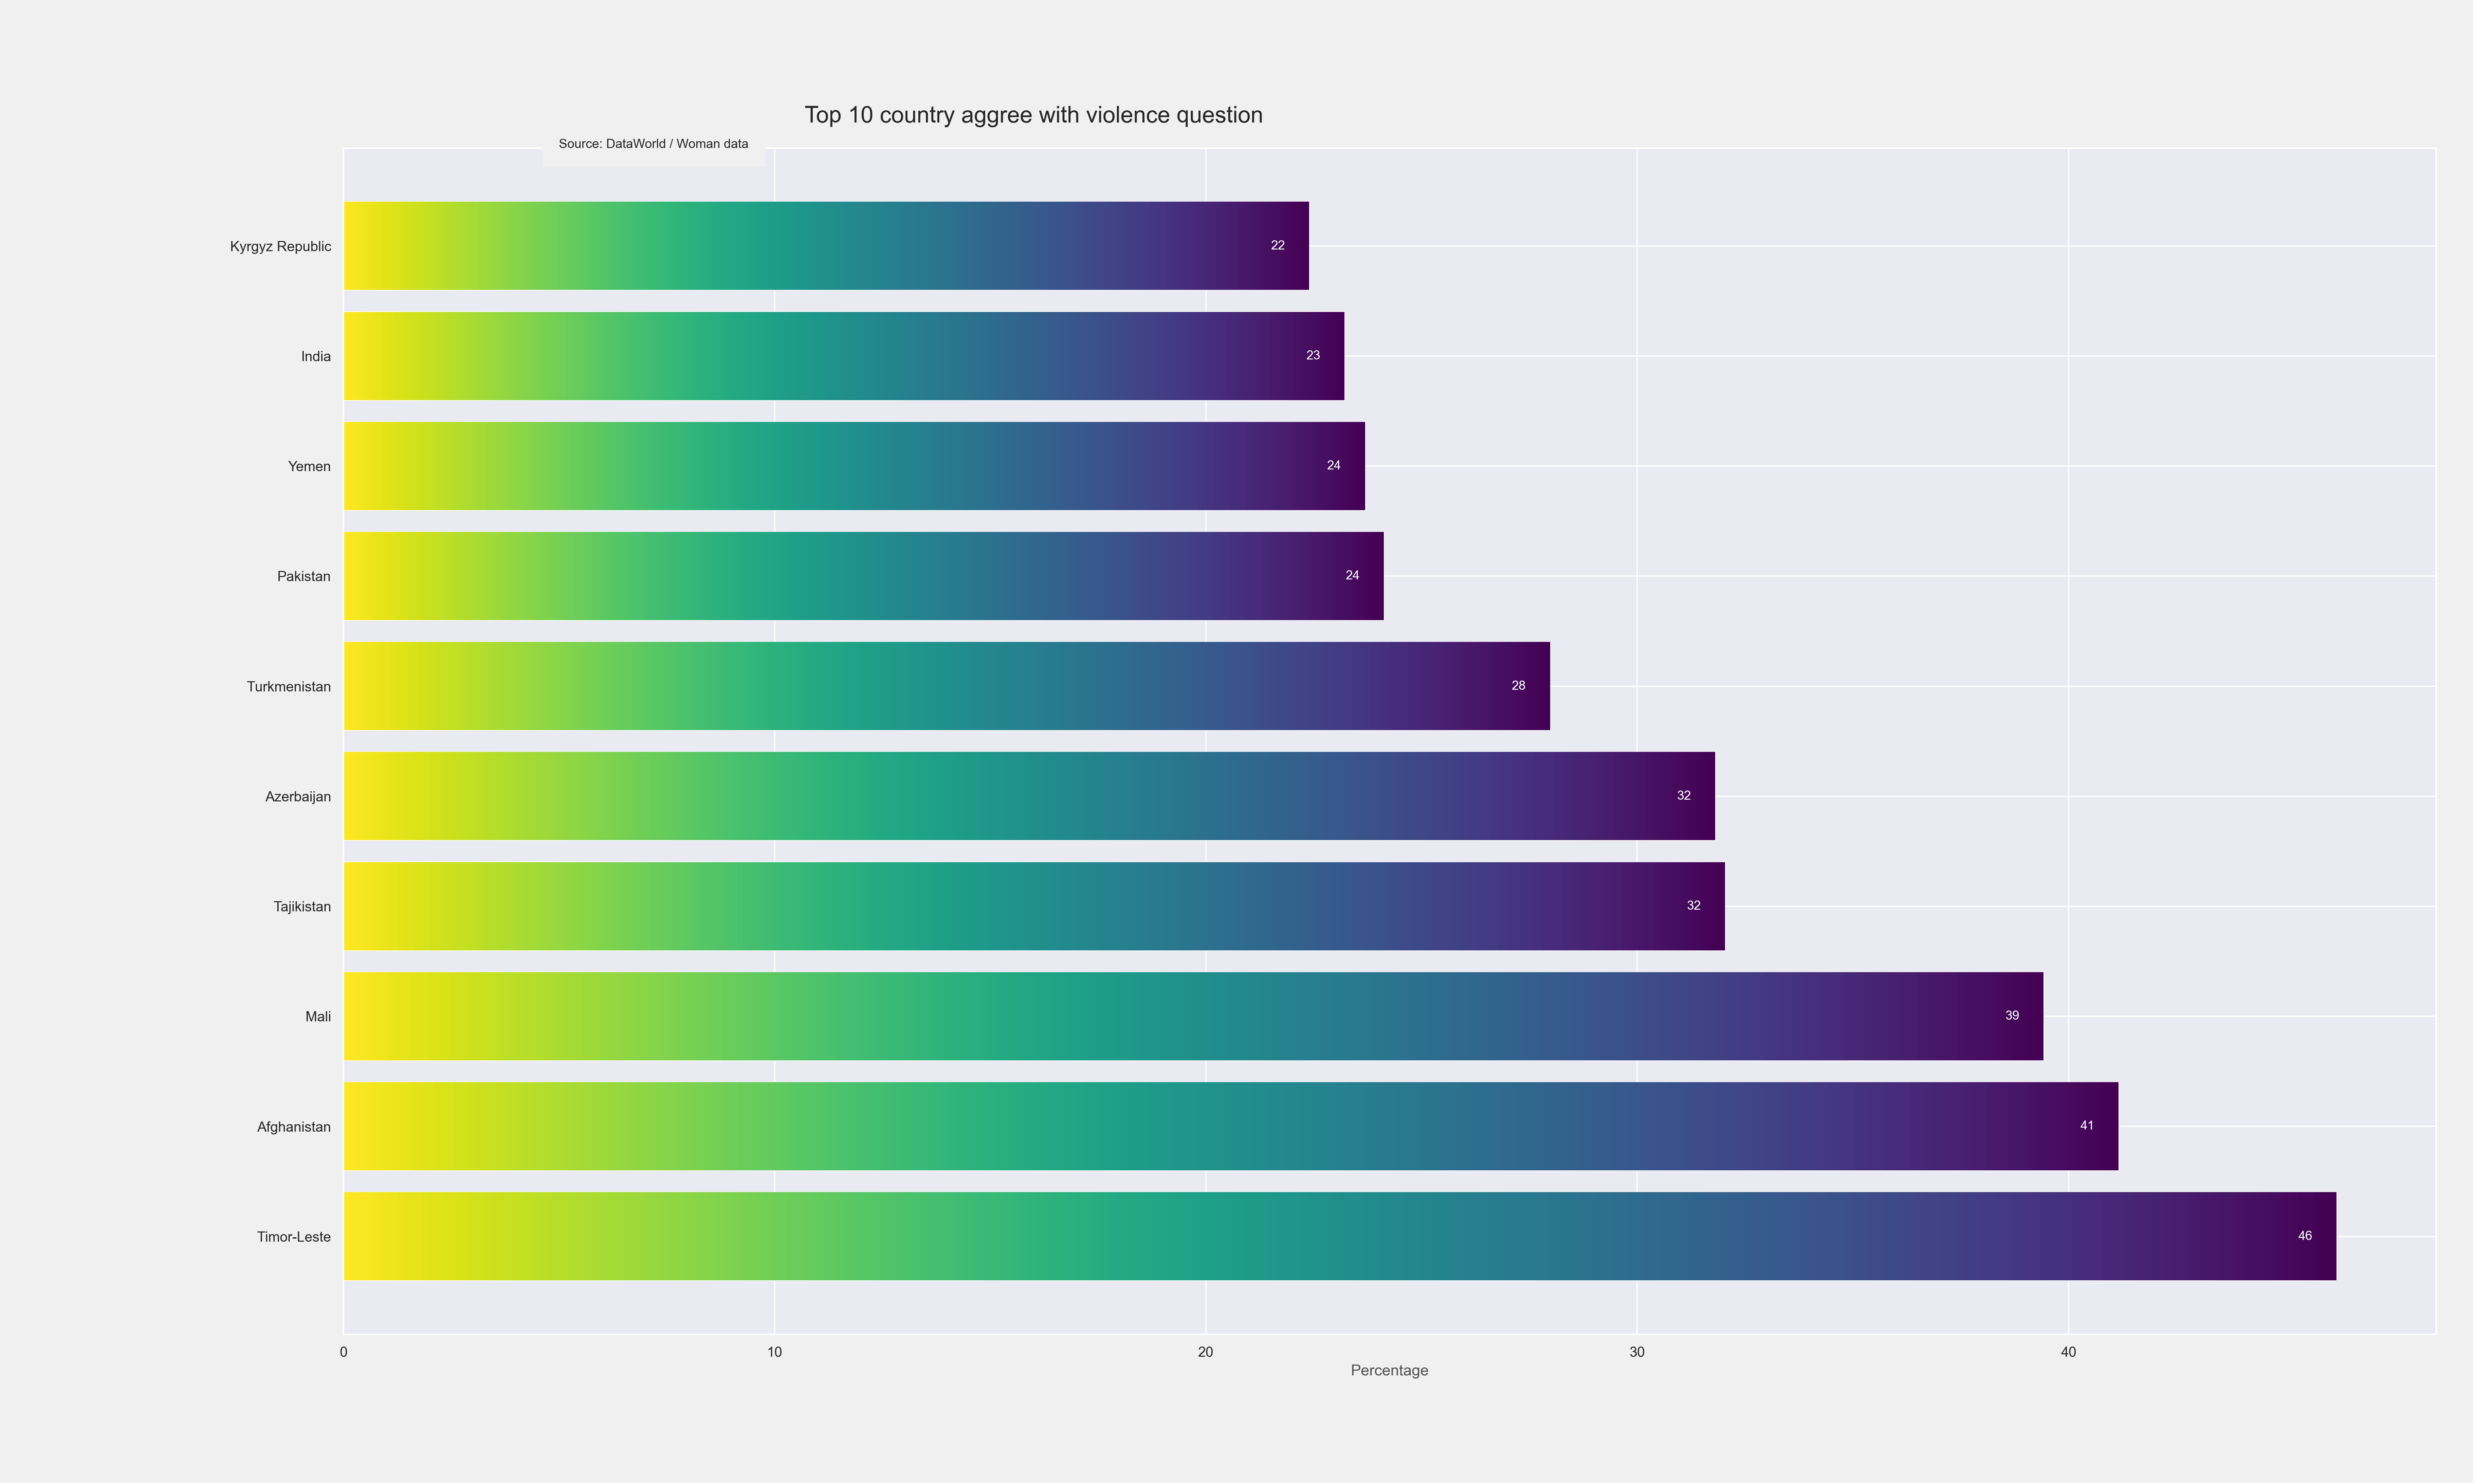

In [13]:
fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
mpl.pyplot.viridis()

In [14]:
bar = ax.barh(index, values)
plt.tight_layout()
ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [15]:
title = plt.title(plot_title, pad=20, fontsize=title_size)
title.set_position([.33, 1])
plt.subplots_adjust(top=0.9, bottom=0.1)

In [16]:
ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256))
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x+w, x, y, y+h], aspect='auto', zorder=1)
    ax.axis(lim)
gradientbars(bar)

In [17]:
        
rects = ax.patches
# Place a label for each bar
for rect in rects:
    # Get X and Y placement of label from rect
    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2

    # Number of points between bar and label; change to your liking
    space = -30
    # Vertical alignment for positive values
    ha = 'left'

    # If value of bar is negative: place label to the left of the bar
    if x_value < 0:
        # Invert space to place label to the left
        space *= -1
        # Horizontally align label to the right
        ha = 'right'

    # Use X value as label and format number
    label = '{:,.0f}'.format(x_value)

    # Create annotation
    plt.annotate(
        label,                      # Use `label` as label
        (x_value, y_value),         # Place label at bar end
        xytext=(space, 0),          # Horizontally shift label by `space`
        textcoords='offset points', # Interpret `xytext` as offset in points
        va='center',                # Vertically center label
        ha=ha,                      # Horizontally align label differently for positive and negative values
        color = 'white')            # Change label color to white
    

In [18]:
        
# Set subtitle
tfrom = ax.get_xaxis_transform()
ann = ax.annotate(subtitle, xy=(5, 1), xycoords=tfrom, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

#Set x-label
ax.set_xlabel(x_label, color='#525252')
    

Text(0.5, 33.249999999999986, 'Percentage')